In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('Diplay.max_columns', None)

In [6]:
df = pd.read_csv('sales.csv')
df.head()

,Date,Product,Units_Sold,Unit_Price
0,01-10-2025,A,10,50
1,02-10-2025,B,15,40
2,03-10-2025,C,8,60
3,04-10-2025,A,12,50


In [15]:
print(df.isnull().sum())
df.fillna(0, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

Date          0
Product       0
Units_Sold    0
Unit_Price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4 non-null      datetime64[ns]
 1   Product     4 non-null      object        
 2   Units_Sold  4 non-null      int64         
 3   Unit_Price  4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 260.0+ bytes


In [17]:
df['Total_Sales'] = np.multiply(df['Units_Sold'], df['Unit_Price'])
df.head()

,Date,Product,Units_Sold,Unit_Price,Total_Sales
0,2025-01-10,A,10,50,500
1,2025-02-10,B,15,40,600
2,2025-03-10,C,8,60,480
3,2025-04-10,A,12,50,600


In [22]:
total_revenue = df['Total_Sales'].sum()
avg_units = df.groupby('Product')['Units_Sold'].mean()
top_Product = df.groupby('Product')['Total_Sales'].sum().idxmax()
print(f"Total Revenue: {total_revenue}")
print("\nAverage Units Sold per Product:\n", avg_units)
print(f"\nTop Selling Product: {top_Product}")

Total Revenue: 2180

Average Units Sold per Product:
 Product
A    11.0
B    15.0
C     8.0
Name: Units_Sold, dtype: float64

Top Selling Product: A


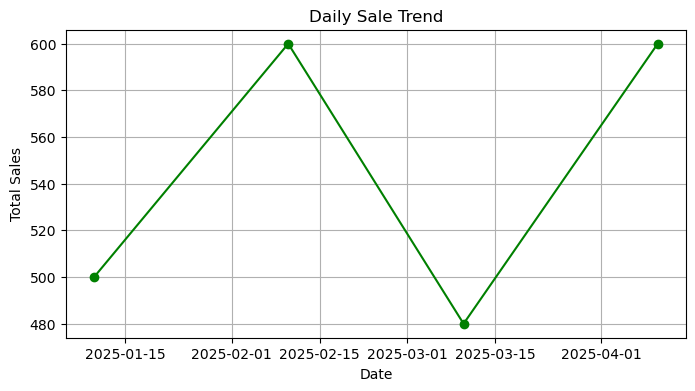

In [24]:
plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['Total_Sales'], marker='o', color='green')
plt.title('Daily Sale Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

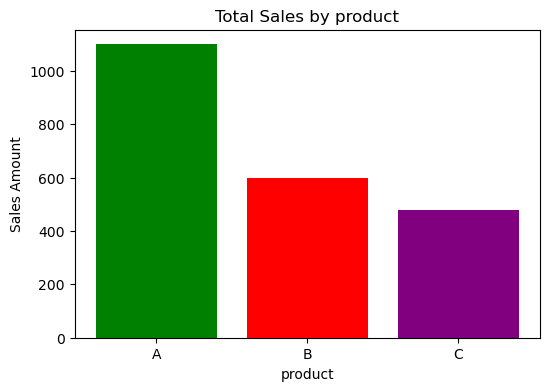

In [30]:
product_sales = df.groupby('Product')['Total_Sales'].sum()
plt.figure(figsize=(6,4))
plt.bar(product_sales.index, product_sales.values, color=['green', 'red', 'purple'])
plt.title('Total Sales by product')
plt.xlabel('product')
plt.ylabel('Sales Amount')
plt.show()